# Libraries

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# Nb doped STO calculations

## Imports

In [10]:
super_array = np.loadtxt("data/7/data.tsv.gz")
time, ksrc_planned_volt, ksrc_curr, agi1_volt, ksrc_actual_volt, ksrc_resistance = super_array[:, 0], super_array[:, 1], super_array[:, 2], super_array[:, 3], super_array[:, 4], super_array[:, 5]

In [11]:
df = pd.DataFrame(data={"KSRC_Voltage (V)" : ksrc_actual_volt, "Current (A)" : ksrc_curr, "AGI_Voltage (V)" : agi1_volt})
df["Resistance (Ohms)"] = df["AGI_Voltage (V)"] / df["Current (A)"]

## Removing the point where voltage is 0

In [12]:
df = df[df["KSRC_Voltage (V)"] != 0]

## Plots

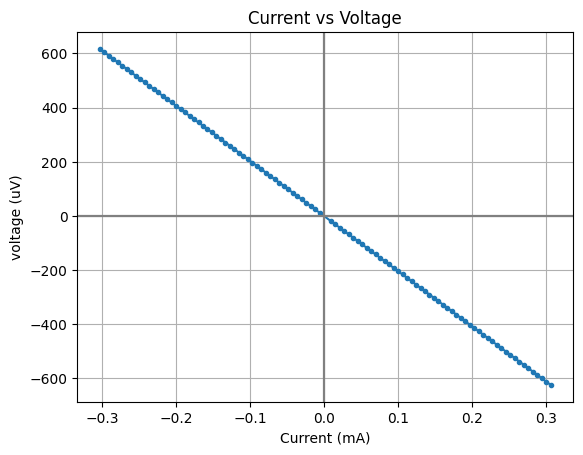

In [13]:
plt.plot(df["Current (A)"] * 1e3, df["AGI_Voltage (V)"] * 1e6, ".-")

plt.title("Current vs Voltage")
plt.xlabel("Current (mA)")
plt.ylabel("voltage (uV)")

plt.axhline(0, color='gray', linewidth=1.6)
plt.axvline(0, color='gray', linewidth=1.6)

plt.grid()

plt.show()

/var/folders/mw/twk2vcyn7d3fvkb20v7n01vr0000gp/T/ipykernel_66492/2684166256.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.axhline(0, color='gray', linewidth=1.6)
/var/folders/mw/twk2vcyn7d3fvkb20v7n01vr0000gp/T/ipykernel_66492/2684166256.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.axvline(0, color='gray', linewidth=1.6)


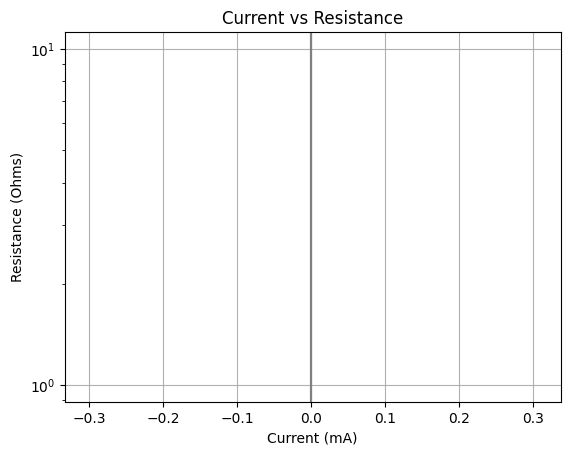

In [14]:
plt.semilogy(df["Current (A)"] * 1e3,df["Resistance (Ohms)"], ".-")

plt.title("Current vs Resistance")
plt.xlabel("Current (mA)")
plt.ylabel("Resistance (Ohms)")

plt.axhline(0, color='gray', linewidth=1.6)
plt.axvline(0, color='gray', linewidth=1.6)

plt.grid()

plt.show()

## Calculating Sheet Resistance and Resisitivity

In [15]:
# https://www.mtixtl.com/STO-Nb-a-050505S2.aspx
# The above link has the resistivity for Nb doped STO
# Refer wikepedia for Van der Pauw measuerements

resistance = np.mean(df["Resistance (Ohms)"])
rs = np.pi * resistance / np.log(2)
print(f"The sheet resistance is: {np.round(rs, 5)} Ohms/square.")
p = rs * 500e-4
print(f"The resistivity is: {np.round(p, 5)} Ohms/cm.")

The sheet resistance is: -9.22301 Ohms/square.
The resistivity is: -0.46115 Ohms/cm.


# STO/Nb calculations

## Imports

In [16]:
super_array = np.loadtxt("data/8/data.tsv.gz")
time, ksrc_planned_volt, ksrc_curr, agi1_volt, ksrc_actual_volt, ksrc_resistance = super_array[:, 0], super_array[:, 1], super_array[:, 2], super_array[:, 3], super_array[:, 4], super_array[:, 5]

In [17]:
df = pd.DataFrame(data={"KSRC_Voltage (V)" : ksrc_actual_volt, "Current (A)" : ksrc_curr, "AGI_Voltage (V)" : -agi1_volt})
df["Resistance (Ohms)"] = df["AGI_Voltage (V)"] / df["Current (A)"]

## Removing the point where voltage is 0

In [18]:
df = df[df["KSRC_Voltage (V)"] != 0]

## Plots

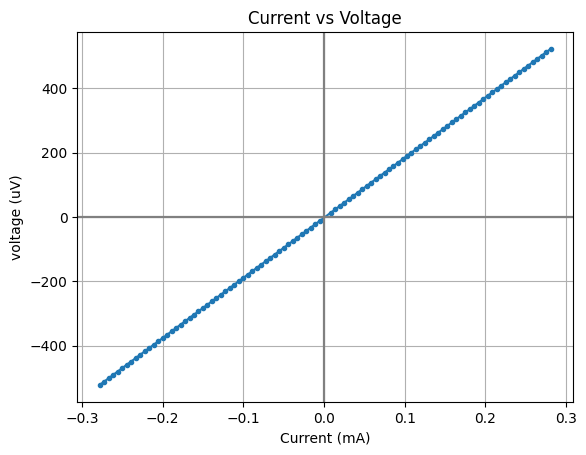

In [19]:
plt.plot(df["Current (A)"] * 1e3, df["AGI_Voltage (V)"] * 1e6, ".-")

plt.title("Current vs Voltage")
plt.xlabel("Current (mA)")
plt.ylabel("voltage (uV)")

plt.axhline(0, color='gray', linewidth=1.6)
plt.axvline(0, color='gray', linewidth=1.6)

plt.grid()

plt.show()

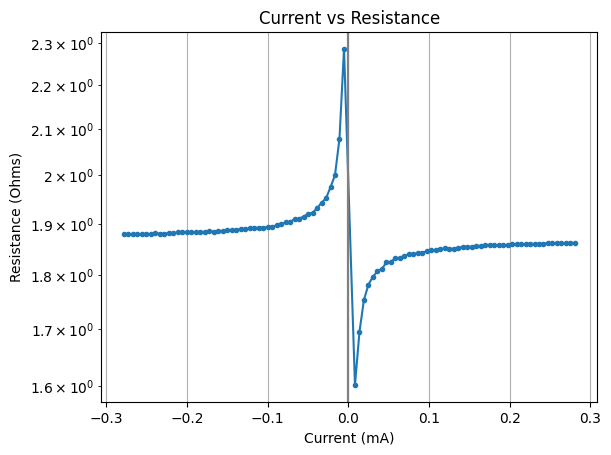

In [20]:
plt.semilogy(df["Current (A)"] * 1e3,df["Resistance (Ohms)"], ".-")

plt.title("Current vs Resistance")
plt.xlabel("Current (mA)")
plt.ylabel("Resistance (Ohms)")

plt.axhline(0, color='gray', linewidth=1.6)
plt.axvline(0, color='gray', linewidth=1.6)

plt.grid()

plt.show()

## Calculating Sheet Resistance and Resistivity

In [21]:
resistance = np.mean(df["Resistance (Ohms)"])
rs = np.pi * resistance / np.log(2)
print(f"The sheet resistance is: {np.round(rs, 5)} Ohms/square.")
p = rs * 500e-4
print(f"The resistivity is: {np.round(p, 5)} Ohms/cm.")

The sheet resistance is: 8.48948 Ohms/square.
The resistivity is: 0.42447 Ohms/cm.


# Sapphire/Nb calculations

## Imports

In [22]:
super_array = np.loadtxt("data/9/data.tsv.gz")
time, ksrc_planned_volt, ksrc_curr, agi1_volt, ksrc_actual_volt, ksrc_resistance = super_array[:, 0], super_array[:, 1], super_array[:, 2], super_array[:, 3], super_array[:, 4], super_array[:, 5]

In [23]:
df = pd.DataFrame(data={"KSRC_Voltage (V)" : ksrc_actual_volt, "Current (A)" : ksrc_curr, "AGI_Voltage (V)" : agi1_volt})
df["Resistance (Ohms)"] = df["AGI_Voltage (V)"] / df["Current (A)"]

## Removing the point where voltage is 0

In [24]:
df = df[df["KSRC_Voltage (V)"] != 0]

## Plots

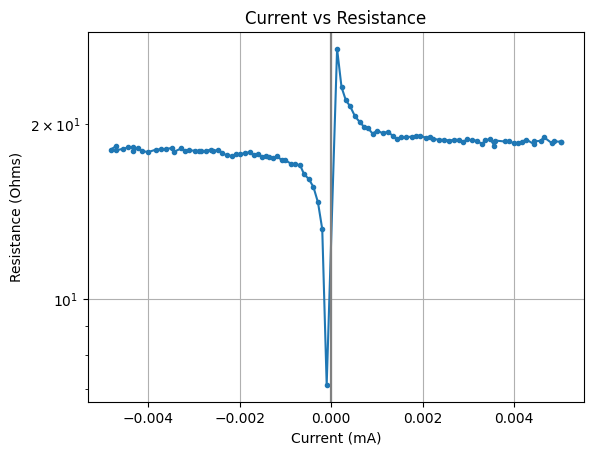

In [25]:
plt.semilogy(df["Current (A)"] * 1e3,df["Resistance (Ohms)"], ".-")

plt.title("Current vs Resistance")
plt.xlabel("Current (mA)")
plt.ylabel("Resistance (Ohms)")

plt.axhline(0, color='gray', linewidth=1.6)
plt.axvline(0, color='gray', linewidth=1.6)

plt.grid()

plt.show()

## Calculating Sheet Resistance and Resistivity

In [26]:
resistance = np.mean(df["Resistance (Ohms)"])
L = 100e-6
W = 50e-6
rs = resistance / (L / W)
print(f"The sheet resistance is: {np.round(rs, 5)} Ohms/square.")
p = rs * 500e-4
print(f"The resistivity is: {np.round(p, 5)} Ohms/cm.")

The sheet resistance is: 9.15751 Ohms/square.
The resistivity is: 0.45788 Ohms/cm.
